# Proyek Klasifikasi


- **Nama:** Dicky Ary Setiawan
- **Email:** DickyAry54@gmail.com
- **ID Dicoding:** ruhe54

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
#Type your code here
df= pd.read_csv('dataset/book_labeling.csv')
df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690.0,27591.0,9/16/2006,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167.0,29221.0,9/1/2004,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333.0,244.0,11/1/2003,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435.0,2339585.0,36325.0,5/1/2004,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164.0,9/13/2004,0


melihat statistik deskriptif dari dataframe

In [ ]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,label
count,11016.000000,11016.000000,11016.000000,1.101600e+04,11016.000000,11016.000000
mean,21302.135621,3.943494,336.891068,1.811486e+04,547.151053,0.025871
std,13091.171861,0.294977,241.143953,1.130306e+05,2588.567663,0.221747
min,1.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,10262.500000,3.780000,194.000000,1.100000e+02,9.000000,0.000000
50%,20245.000000,3.960000,300.000000,7.680000e+02,48.000000,0.000000
75%,32102.250000,4.140000,416.000000,5.075000e+03,242.000000,0.000000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,3.000000


Melihat informasi dataframe antara lain column dan datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11016 non-null  int64  
 1   title               11016 non-null  object 
 2   authors             11016 non-null  object 
 3   average_rating      11016 non-null  float64
 4   language_code       11016 non-null  object 
 5   num_pages           11016 non-null  float64
 6   ratings_count       11016 non-null  float64
 7   text_reviews_count  11016 non-null  float64
 8   publication_date    11016 non-null  object 
 9   label               11016 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 860.8+ KB


Melihat buku dengan jumlah halaman paling banyak

In [ ]:
df[df.num_pages == 6576]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
6440,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,eng,6576.0,1338.0,81.0,10/17/2004,0


Melihat apakah terdapat rating_count dengan nilai 0

In [ ]:
df[df.ratings_count	== 0].count()

,0
bookID,0
title,0
authors,0
average_rating,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0
publication_date,0
label,0


Melakukan drop pada rating_count dengan nilai 0

In [ ]:
df = df.drop(df[df.ratings_count == 0].index)
df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690.0,27591.0,9/16/2006,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167.0,29221.0,9/1/2004,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333.0,244.0,11/1/2003,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435.0,2339585.0,36325.0,5/1/2004,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164.0,9/13/2004,0


In [ ]:
df[df.ratings_count == 0]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label


Mengetahui apakah terdapat nilai NA pada dataframe

In [ ]:
df.isna().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0
publication_date,0
label,0


Melakukan plot dengan nilai X=rating dan Y=jumlah buku

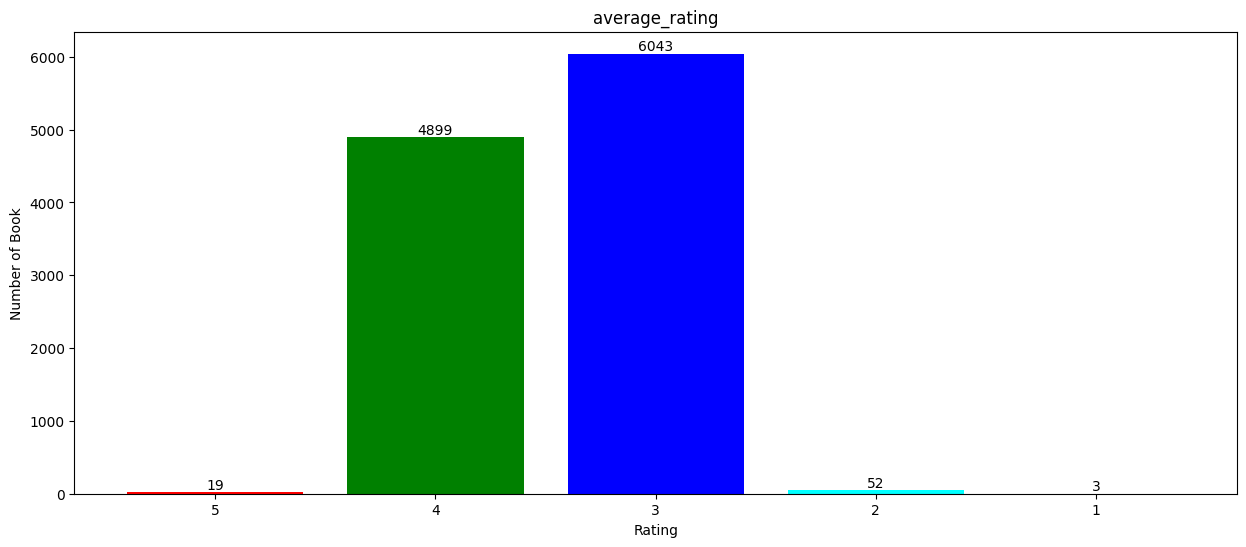

In [ ]:
rating_5 = df.average_rating[(df.average_rating == 5)]
rating_4 = df.average_rating[(df.average_rating >= 4) & (df.average_rating < 5)]
rating_3 = df.average_rating[(df.average_rating >= 3) & (df.average_rating < 4)]
rating_2 = df.average_rating[(df.average_rating >= 2) & (df.average_rating < 3)]
rating_1 = df.average_rating[(df.average_rating >= 1) & (df.average_rating < 2)]

x = ["5", "4", "3", "2", "1"]
y = [len(rating_5.values), len(rating_4.values), len(rating_3.values), len(rating_2.values), len(rating_1.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("average_rating")
plt.xlabel("Rating")
plt.ylabel("Number of Book")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Membuat plot persebaran data antara rating_count dan average rating

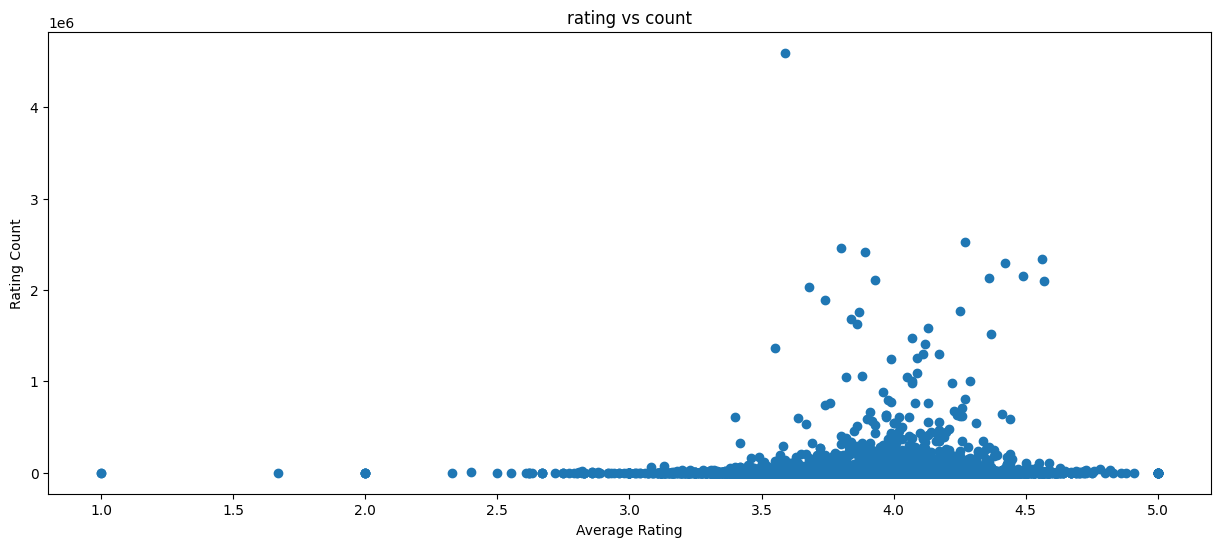

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(df.average_rating,df.ratings_count)
plt.title("rating vs count")
plt.xlabel("Average Rating")
plt.ylabel("Rating Count")
plt.show()

membuat plot heatmap untuk menggambarkan secara visual korelasi antara beberapa variabel numerik dalam suatu kumpulan data dengan menampilkannya sebagai kotak berkode warna

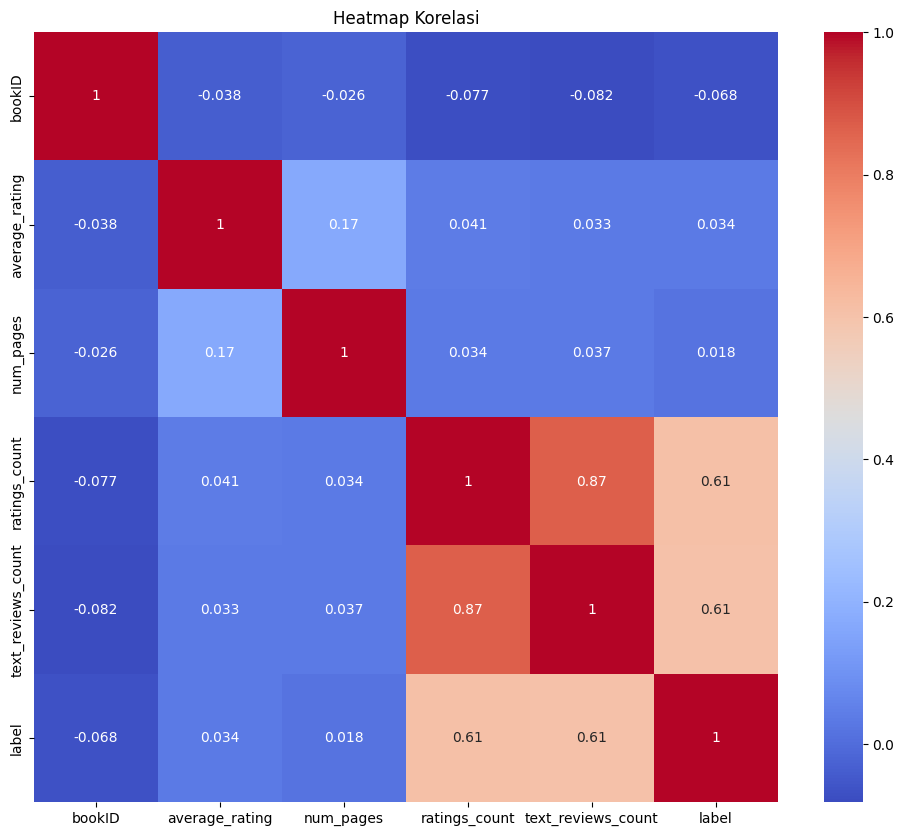

In [ ]:
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,10))
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Insight yang didapatkan:
1. penyebaran rating paling tinggi berada pada rating 3 dan paling rendah terdapat pada rating 5.
2. Buku dengan rating rata-rata rendah (di bawah 3.0) memiliki jumlah rating yang sangat sedikit. Ini menunjukkan bahwa buku-buku dengan kualitas yang dirasakan buruk cenderung mendapatkan perhatian yang lebih sedikit dari pembaca.
3. Sebagian besar data terlihat terkonsentrasi di area rating rata-rata antara 3.5 hingga 4.5, dengan jumlah rating yang rendah hingga sedang.
4. label,text_reviews_count ,dan rating_count memiliki hubungan yang sangat dekat.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
df2 = df.drop(columns=['bookID','title','authors','language_code','publication_date'])
df2.head()

,average_rating,num_pages,ratings_count,text_reviews_count,label
0,4.57,652.0,2095690.0,27591.0,1
1,4.49,870.0,2153167.0,29221.0,1
2,4.42,352.0,6333.0,244.0,0
3,4.56,435.0,2339585.0,36325.0,1
4,4.78,2690.0,41428.0,164.0,0


In [ ]:
scaler = MinMaxScaler()
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

X = df2.drop(columns=['label'])
z = df2['label']
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(z)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8812, 4), y_train=(8812,)
Test set shape: X_test=(2204, 4), y_test=(2204,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
#Type your code here
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[2165    0    3]
 [   0    9    1]
 [   7    0   19]]
True Positive (TP): [2165    0    3    0    9    1    7    0   19]
False Positive (FP): [2165    0    3    0    9    1    7    0   19]
False Negative (FN): [2165    0    3    0    9    1    7    0   19]
True Negative (TN): [2165    0    3    0    9    1    7    0   19]
Accuracy: 0.9950
Precision: 0.9950
Recall: 0.9950
F1-Score: 0.9950090744101633

----------------------------------------



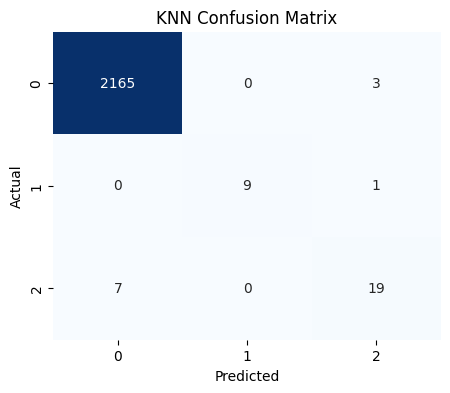

In [ ]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn = cm_knn.ravel()
fp = cm_knn.ravel()
fn = cm_knn.ravel()
tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn,average='micro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn,average='micro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn,average='micro')}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[2168    0    0]
 [   0    8    2]
 [  13    0   13]]
True Positive (TP): [2168    0    0    0    8    2   13    0   13]
False Positive (FP): [2168    0    0    0    8    2   13    0   13]
False Negative (FN): [2168    0    0    0    8    2   13    0   13]
True Negative (TN): [2168    0    0    0    8    2   13    0   13]
Accuracy: 0.9932
Precision: 0.9932
Recall: 0.9932
F1-Score: 0.9932

----------------------------------------



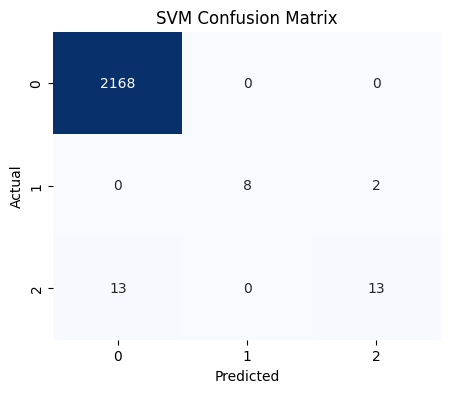

In [ ]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn = cm_svm.ravel()
fp = cm_svm.ravel()
fn = cm_svm.ravel()
tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm,average='micro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm,average='micro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm,average='micro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Evaluasi**

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 99.50%
   - **Precision**: 99.50%
   - **Recall**: 99.50%
   - **F1-Score**: 99.50%

   **Analisis**: dalam methode KNN ini memiliki nilai accurasy,precision,recall,dan F1 sangat memuaskan karena nilai yang didapatka mencapai nilai 99.50% yang dimana muncul error akan sangat kecil dan dari kedua methode yang digunakan methode ini adalah methode dengan nilai accurasy,precision,recall,dan F1 yang paling baik meskipun hanya terpaut 0.19% saja.

2. **Support Vector Machine (SVM)**
   - **Accuracy**: 99.31%
   - **Precision**: 99.31%
   - **Recall**: 99.31%
   - **F1-Score**: 99.31%

   **Analisis**: metode SVM yang digunakan menunjukkan nilai yang hampir mirip dengan KNN dimana nilai accurasy,precision,recall,dan F1 yang didapatkan adalah 99.31% nilai ini sudah sangat baik dan hampir menyentuh nilai 100% tetapi nilai yang didapatkan lebih rendah dari KNN.


1.Apakah buku dengan jumlah halaman yang lebih banyak cenderung mendapatkan rating lebih tinggi atau lebih rendah?

2.Bagaimana distribusi rating untuk semua buku? Apakah ada pola tertentu?

3.Apakah buku yang ditulis oleh penulis yang sama cenderung memiliki rating yang mirip?

**1.Apakah buku dengan jumlah halaman yang lebih banyak cenderung mendapatkan rating lebih tinggi atau lebih rendah?**

membuat variable dengan df.num_pages lebih dari 1000

In [ ]:
num_pagedf = df[df.num_pages >= 1000]
num_pagedf.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164.0,9/13/2004,0
5,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342.0,28242.0,808.0,9/12/2005,0
20,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,eng,1728.0,101233.0,1550.0,9/25/2012,0
21,31,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,eng,1184.0,1710.0,91.0,10/21/2004,0
23,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,en-US,1216.0,1618.0,140.0,10/1/2002,0


In [ ]:
num_pagedf.sort_values(by='average_rating', ascending=False)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
6528,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456.0,32213.0,930.0,9/6/2005,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164.0,9/13/2004,0
5,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342.0,28242.0,808.0,9/12/2005,0
5568,20749,Study Bible: NIV,Anonymous,4.70,eng,2198.0,4166.0,186.0,10/1/2002,0
6440,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576.0,1338.0,81.0,10/17/2004,0
...,...,...,...,...,...,...,...,...,...,...
7136,27618,Hasta que te encuentre,John Irving/Carlos Milla Soler,3.63,spa,1024.0,28.0,3.0,5/1/2006,0
1090,3738,Typee / Omoo / Mardi,Herman Melville/G. Thomas Tanselle,3.55,eng,1333.0,644.0,26.0,5/6/1982,0
798,2701,The Canterbury Tales (original-spelling edition),Geoffrey Chaucer/Jill Mann,3.49,enm,1254.0,792.0,59.0,4/7/2005,0
10232,41856,Writings and Selected Narratives of the Explor...,John Smith,3.39,en-US,1327.0,28.0,3.0,3/22/2007,0


membuat plot dengan average_rating dan jumlah halaman dengan menggunakan dataframe yang berisi buku dengan halaman diatas 1000.

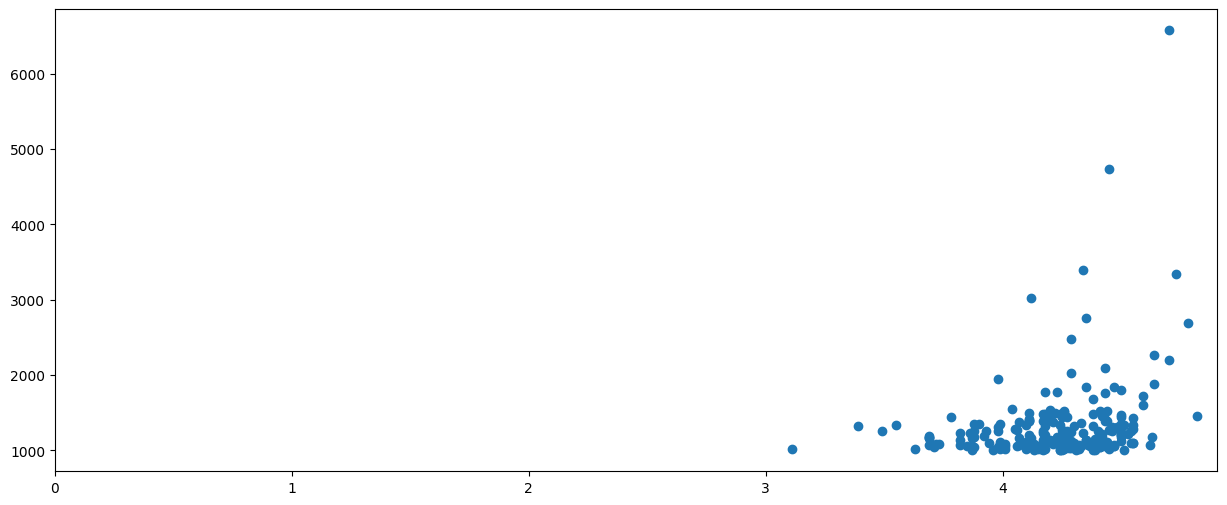

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(num_pagedf.average_rating,num_pagedf.num_pages)
plt.xlim(left=0)
plt.show()

2.bagaimana distribusi rating untuk semua buku? Apakah ada pola tertentu?


membuat boxplot dengan nilai x= label dan y=rating_count

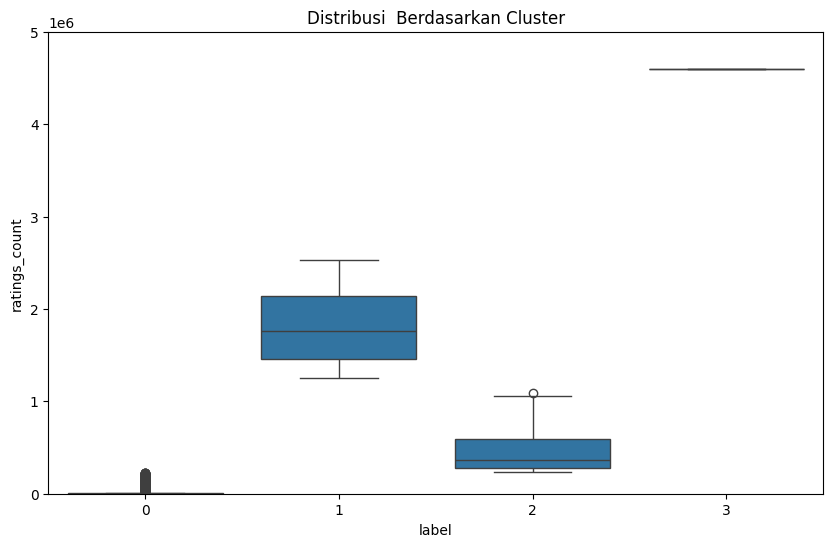

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='ratings_count', data=df)
plt.title('Distribusi  Berdasarkan Rating_count')
plt.ylim(0, 5000000)
plt.show()

In [ ]:
df[df.label == 2].sort_values(by='ratings_count', ascending=False)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
4393,15931,The Notebook (The Notebook #1),Nicholas Sparks,4.09,eng,214.0,1090603.0,15272.0,7/5/2004,2
507,1618,The Curious Incident of the Dog in the Night-Time,Mark Haddon,3.88,eng,226.0,1054308.0,35537.0,5/18/2004,2
885,2956,The Adventures of Huckleberry Finn (Adventures...,Mark Twain/Guy Cardwell/John Seelye/Walter Trier,3.82,eng,327.0,1049912.0,11391.0,12/31/2002,2
9344,37435,The Secret Life of Bees,Sue Monk Kidd,4.05,eng,302.0,1044725.0,26279.0,1/28/2003,2
1414,4981,Slaughterhouse-Five,Kurt Vonnegut Jr.,4.07,eng,275.0,1001671.0,19056.0,1/12/1999,2
...,...,...,...,...,...,...,...,...,...,...
2807,10534,The Art of War,Sun Tzu/Thomas Cleary/Pulat Otkan/Giray Fidan,3.97,eng,273.0,235924.0,5869.0,1/11/2005,2
3314,12220,A Streetcar Named Desire,Tennessee Williams,3.98,eng,107.0,235224.0,2409.0,12/1/1952,2
8664,33722,The Undomestic Goddess,Sophie Kinsella,3.83,eng,404.0,235032.0,6613.0,4/25/2006,2
1646,5805,V for Vendetta,Alan Moore/David Lloyd,4.25,eng,296.0,234954.0,4058.0,11/1/2005,2


dilanjutkan dengan membuat boxplot dengan nilai x=label dan y=average_rating

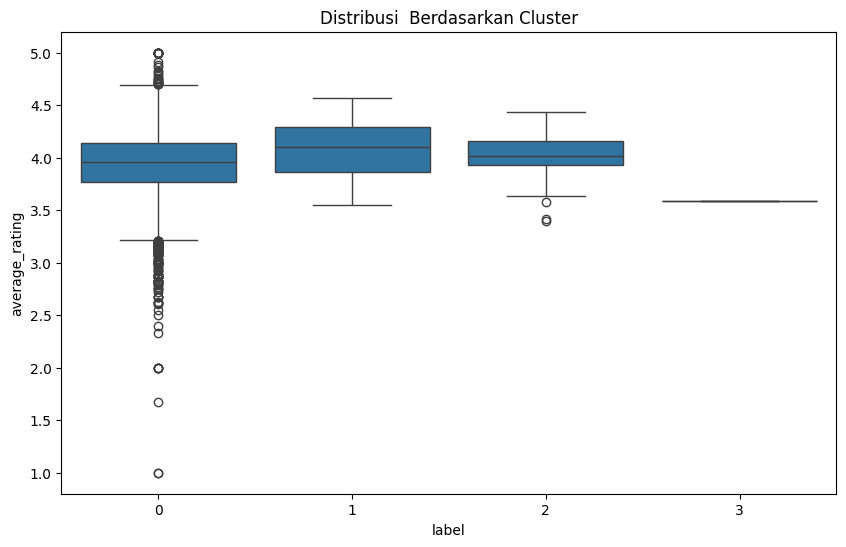

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='average_rating', data=df)
plt.title('Distribusi  Berdasarkan rating')
plt.show()

3.Apakah buku yang ditulis oleh penulis yang sama cenderung memiliki rating yang mirip?

membuat variable yang berisi buku dengan author J.K.Rowling

In [ ]:
Rowling_df = df[df.authors == 'J.K. Rowling']
Rowling_df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333.0,244.0,11/1/2003,0
5,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342.0,28242.0,808.0,9/12/2005,0
604,2002,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,eng,240.0,11515.0,139.0,11/1/2001,0
606,2005,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,768.0,1213.0,78.0,6/23/2006,0
973,3357,Harry Potter Y La Piedra Filosofal (Harry Pott...,J.K. Rowling,4.47,spa,254.0,142.0,12.0,3/6/2001,0


Membuat scaterplot untuk melihat penyebaran data average_rating dan num_page dengan menggunakan dataframe buku dengan author J.K.Rowling

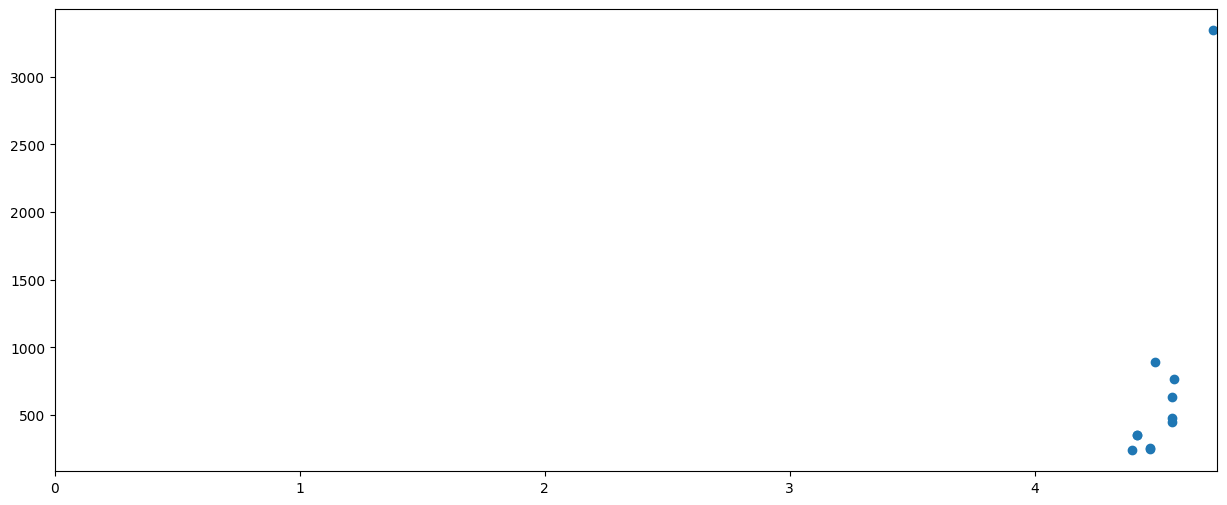

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(Rowling_df.average_rating,Rowling_df.num_pages)
plt.xlim(left=0)
plt.show()

membuat variable yang berisi buku dengan author Agatha Christie

In [ ]:
Agatha_df = df[df.authors == 'Agatha Christie']
Agatha_df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,label
4478,16297,Cards on the Table (Hercule Poirot #15),Agatha Christie,3.92,eng,324.0,25236.0,1046.0,7/5/2005,0
4479,16298,A Murder Is Announced (Miss Marple #5),Agatha Christie,3.98,eng,288.0,33195.0,1220.0,9/30/2006,0
4480,16299,And Then There Were None,Agatha Christie,4.26,eng,264.0,625767.0,18785.0,5/3/2004,2
4481,16300,Sleeping Murder (Miss Marple #13),Agatha Christie,3.95,eng,242.0,19657.0,884.0,8/4/2003,0
4483,16304,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.17,eng,322.0,145660.0,5711.0,8/31/2004,0


Membuat scaterplot untuk melihat penyebaran data average_rating dan num_page dengan menggunakan dataframe buku dengan author Agatha Christie

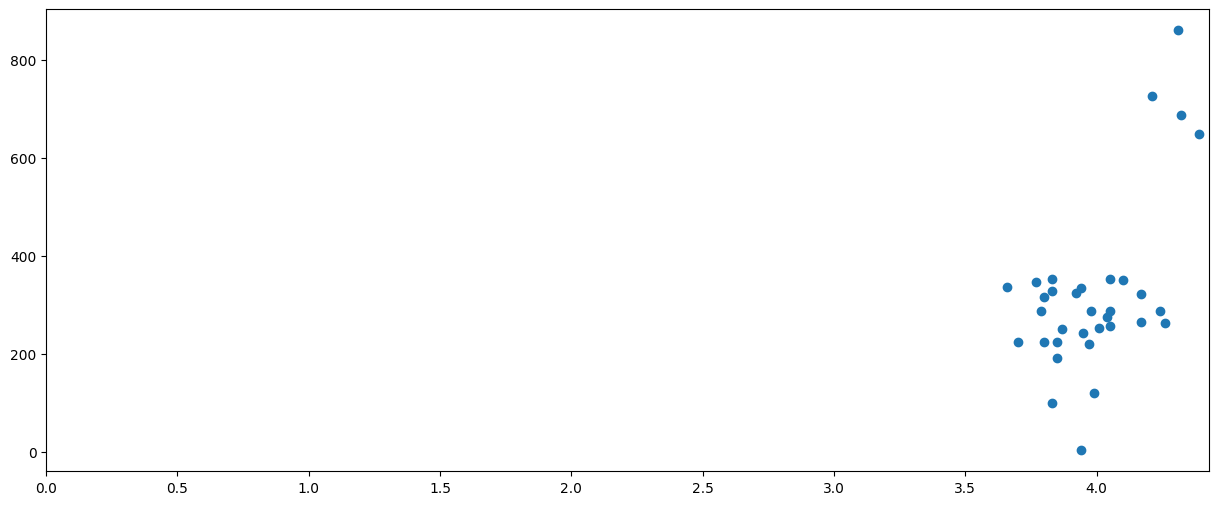

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(Agatha_df.average_rating,Agatha_df.num_pages)
plt.xlim(left=0)
plt.show()

Jawaban Pertanyaan

1.Apakah buku dengan jumlah halaman yang lebih banyak cenderung mendapatkan rating lebih tinggi atau lebih rendah?

Jawaban : Sangat mengejutkan bahwa buku dengan halaman lebih dari 1000 lembar memiliki rating yang sangat tinggi. bahkan rating terendah adalah 'Billy Budd Sailor and Other Uncompleted Writings' yang ditulis oleh 'Herman Melville' dengan 1016 halaman dan yang tertinggi adalah 'The Complete Calvin and Hobbes' yang ditulis 'Bill Watterson' dengan 1456 halaman

2.bagaimana distribusi rating untuk semua buku? Apakah ada pola tertentu?

dari data diatas dapat dilihat bahwa distribusi rating yang didapatkan sangat merata , tetapi terdapat pola dimana label 0 memiliki rating count yang terendah yaitu dibawah 250ribu reviewer, label 1 12-25 juta reviewer , label 250ribu - 12 juta reviewer ,dan label 3 lebih dari 25 juta reviewer

3.Apakah buku yang ditulis oleh penulis yang sama cenderung memiliki rating yang mirip?

dari data diatas diambil dua pengarang terkenal yang menulis buku sendirian yaitu J.K Rowling dengan buku terkenalnya harry potter dan Agatha Cristhie yang dijuluki sebagai ratu misteri, dari data diatas memang betul bahwa buku yang ditulis oleh penulis yang sama cenderung memiliki rating yang tidak jauh berbeda antara satu dengan lainnya